#Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

In [2]:
import pathlib

In [3]:
import shutil

## Downloading data

In [4]:
url = "https://ai.stanford.edu/%7Eamaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = keras.utils.get_file(origin=url, untar=True,  cache_dir=".", cache_subdir="")

84140032/84125825 [==============================] - 3s 0us/step


In [5]:
dataset

'./aclImdb_v1'

In [6]:
dataset_dir= os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

['test', 'train', 'imdbEr.txt', 'imdb.vocab', 'README']

In [7]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['unsup',
 'urls_unsup.txt',
 'urls_pos.txt',
 'urls_neg.txt',
 'pos',
 'labeledBow.feat',
 'neg',
 'unsupBow.feat']

In [8]:
with open(os.path.join(train_dir, 'pos', '9338_8.txt'), 'rb') as file:
  a = file.read()
print(a)

b"True, the idea for this TV series may have sprung from the immense success which Ally McBeal is enjoying worldwide, even here in Germany. However, this said, Edel & Starck is very different from Ally McBeal in many ways.<br /><br />The two main characters work beautifully together. Felix Edel (Felix Noble), played by well-known German actor, Christoph M. Ohrt and Sandra Starck (Sandra Strong - Noble & Strong, get it ???), played by charming Rebecca Immanuel, exchange quick romantic repartees and continually spy on each other while engaging in sitcom-like criminal cases in Berlin and surroundings. Further, they are aided by a magnificent cast of co-stars, most notably their secretary, played by Isabel Tuengerthal, who is a rare gem with GREAT comic potential. Also the shady wheeler-dealer, Otto, and the noble childhood pal of Felix, Frank, work very well, not to forget Sandra's best friend and room-mate, Patricia, played by the beautiful Barbara Demmer.<br /><br />All-in-all a joy to 

In [9]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [10]:
os.listdir(train_dir)

['urls_unsup.txt',
 'urls_pos.txt',
 'urls_neg.txt',
 'pos',
 'labeledBow.feat',
 'neg',
 'unsupBow.feat']

In [11]:
batch_size = 1024
seed = 123
train_ds = keras.utils.text_dataset_from_directory(train_dir, validation_split=0.2, batch_size = batch_size, 
                                                   subset="training", seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [12]:
val_ds = keras.utils.text_dataset_from_directory(train_dir, batch_size = batch_size, validation_split=0.2,
                                                 subset="validation", seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [13]:
for comment, label in train_ds.take(1):
  for i in range(10):
    print("Comment : " , comment.numpy()[i])
    print("Label : ", label.numpy()[i] )

Comment :  b"Oh My God! Please, for the love of all that is holy, Do Not Watch This Movie! It it 82 minutes of my life I will never get back. Sure, I could have stopped watching half way through. But I thought it might get better. It Didn't. Anyone who actually enjoyed this movie is one seriously sick and twisted individual. No wonder us Australians/New Zealanders have a terrible reputation when it comes to making movies. Everything about this movie is horrible, from the acting to the editing. I don't even normally write reviews on here, but in this case I'll make an exception. I only wish someone had of warned me before I hired this catastrophe"
Label :  0
Comment :  b'This movie is SOOOO funny!!! The acting is WONDERFUL, the Ramones are sexy, the jokes are subtle, and the plot is just what every high schooler dreams of doing to his/her school. I absolutely loved the soundtrack as well as the carefully placed cynicism. If you like monty python, You will love this film. This movie is a

## Seems like Label - 0 is Negative and Label - 1 is Positive

In [14]:
for i,label in enumerate(train_ds.class_names):
  print(f"Label : {i} corresponds to {label}")

Label : 0 corresponds to neg
Label : 1 corresponds to pos


# Tuning dataset for performance

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# EMBEDDING LAYER

In [21]:
embedding_layer = keras.layers.Embedding(1000, 5)

In [23]:
embedding_layer(np.array([1,2,3,4]))

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[ 0.03074603,  0.01978328, -0.0233382 ,  0.01250514, -0.02177349],
       [ 0.04578285, -0.01539839, -0.04099145, -0.03673918,  0.03715948],
       [ 0.02414978, -0.04074417,  0.02730191, -0.03456154, -0.01447765],
       [-0.03143275,  0.04047566, -0.04486752, -0.03880528,  0.03702681]],
      dtype=float32)>

# Text vectorization

In [24]:
max_tokens = 1000
vectorize_layer = keras.layers.TextVectorization(max_tokens= max_tokens)

In [26]:
train_X = train_ds.map(lambda x, y :  x)

In [28]:
train_X_batch = next(iter(train_X))
sample = train_X_batch[0]
print(sample)

tf.Tensor(b"Wow. Some movies just leave me speechless. This was undeniably one of those movies. When I left the theatre, not a single word came to my mouth. All I had was an incredible urge to slam my head against the theatre wall to help me forget about the last hour and a half. Unfortunately, it didn't work. Honestly, this movie has nothing to recommend. The humor was at the first grade level, at best, the acting was overly silly, and the plot was astronomically far-fetched. I hearby pledge never to see an other movie starring Chris Kattan or any other cast-member of SNL.", shape=(), dtype=string)


In [29]:
vectorize_layer.adapt(train_X)

In [30]:
vectorize_layer(sample)

<tf.Tensor: shape=(103,), dtype=int64, numpy=
array([  1,  47,  93,  41, 547,  70,   1,  11,  14,   1,  29,   5, 144,
        93,  51,  10, 307,   2,   1,  22,   4, 708, 704, 364,   6,  56,
         1,  32,  10,  68,  14,  34,   1,   1,   6,   1,  56, 434, 424,
         2,   1,   1,   6, 328,  70, 837,  43,   2, 227, 549,   3,   4,
       352, 457,   9, 153, 163,   1,  11,  18,  44, 158,   6, 370,   2,
       490,  14,  31,   2,  83,   1, 672,  31, 115,   2, 114,  14,   1,
       720,   3,   2, 113,  14,   1,   1,  10,   1,   1, 110,   6,  66,
        34,  82,  18,   1,   1,   1,  42,  98,  82,   1,   5,   1])>

In [ ]:
vectorize_layer.get_vocabulary()

In [32]:
vocab_size = 1000 
embedding_dim = 20
model = keras.models.Sequential([
                                 vectorize_layer,
                                 keras.layers.Embedding(vocab_size, embedding_dim),
                                 keras.layers.GlobalAveragePooling1D(),
                                 keras.layers.Dense(16),
                                 keras.layers.Dense(1)
])


In [33]:
model.compile(optimizer="adam",
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs")

In [39]:
model.fit(train_ds,
                    validation_data = val_ds,
                    epochs= 15,
                    callbacks= [tensorboard_callback])

Epoch 1/15
20/20 [==============================] - 2s 103ms/step - loss: 0.5748 - accuracy: 0.6263 - val_loss: 0.5473 - val_accuracy: 0.6724
Epoch 2/15
20/20 [==============================] - 3s 143ms/step - loss: 0.5595 - accuracy: 0.6471 - val_loss: 0.5309 - val_accuracy: 0.6952
Epoch 3/15
20/20 [==============================] - 2s 119ms/step - loss: 0.5444 - accuracy: 0.6660 - val_loss: 0.5149 - val_accuracy: 0.7158
Epoch 4/15
20/20 [==============================] - 1s 75ms/step - loss: 0.5295 - accuracy: 0.6867 - val_loss: 0.4995 - val_accuracy: 0.7330
Epoch 5/15
20/20 [==============================] - 2s 88ms/step - loss: 0.5152 - accuracy: 0.7076 - val_loss: 0.4850 - val_accuracy: 0.7428
Epoch 6/15
20/20 [==============================] - 2s 84ms/step - loss: 0.5015 - accuracy: 0.7254 - val_loss: 0.4716 - val_accuracy: 0.7578
Epoch 7/15
20/20 [==============================] - 2s 84ms/step - loss: 0.4887 - accuracy: 0.7401 - val_loss: 0.4593 - val_accuracy: 0.7704
Epoch 8/15

In [ ]:
%reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

# Loading test_ds

In [42]:
test_ds = keras.utils.text_dataset_from_directory('aclImdb/test', batch_size= batch_size)

Found 25000 files belonging to 2 classes.


# Evaludating model on test_ds

In [43]:
loss, accuracy =model.evaluate(test_ds)

25/25 [==============================] - 8s 279ms/step - loss: 0.4147 - accuracy: 0.8031


In [44]:
POS_Comment = "It was such a fantastic movie, loved it"
NEG_Comment = "Boring and time wasting, do not recommend"

In [49]:
prediction = model.predict([POS_Comment, NEG_Comment])

In [50]:
tf.math.softmax(prediction)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [51]:
NEG_Comments = [
                "Terrible Movie, boring",
                "Do not recommend",
                "Disgusting and Time wasting",
                "Not funny at all",
                "Most bizzarre movie of all time"
]

In [52]:
tf.math.softmax(model.predict(NEG_Comments))

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [53]:
model.predict(NEG_Comments)

array([[-73.81365 ],
       [ -2.609833],
       [ 21.69761 ],
       [-29.00036 ],
       [ 27.09492 ]], dtype=float32)

In [61]:
tf.round(tf.math.sigmoid(model.predict(NEG_Comments)))

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

# Custom standardization

In [63]:
import re
import string

In [62]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')


## Vectorization layer with custom standardization

In [64]:
max_features = 10000
sequence_length = 200
vectorization_layer = keras.layers.TextVectorization(standardize= custom_standardization,
                                                     max_tokens= max_features,
                                                     output_mode = 'int',
                                                     output_sequence_length= sequence_length
                                                     )

In [68]:
vectorization_layer.adapt(train_X)

In [74]:
model = keras.models.Sequential([
                                 vectorization_layer,
                                 keras.layers.Embedding(vocab_size, embedding_dim, name="embedding"),
                                 keras.layers.GlobalAveragePooling1D(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(16),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
model.compile(optimizer='adam',
              loss = keras.losses.BinaryCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [76]:
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 20,
                    )

Epoch 1/20
20/20 [==============================] - 4s 147ms/step - loss: 0.6923 - accuracy: 0.5592 - val_loss: 0.6910 - val_accuracy: 0.6652
Epoch 2/20
20/20 [==============================] - 1s 58ms/step - loss: 0.6891 - accuracy: 0.6568 - val_loss: 0.6867 - val_accuracy: 0.6624
Epoch 3/20
20/20 [==============================] - 2s 96ms/step - loss: 0.6832 - accuracy: 0.6719 - val_loss: 0.6785 - val_accuracy: 0.6788
Epoch 4/20
20/20 [==============================] - 1s 65ms/step - loss: 0.6729 - accuracy: 0.6896 - val_loss: 0.6655 - val_accuracy: 0.6910
Epoch 5/20
20/20 [==============================] - 2s 86ms/step - loss: 0.6572 - accuracy: 0.7020 - val_loss: 0.6470 - val_accuracy: 0.6998
Epoch 6/20
20/20 [==============================] - 1s 64ms/step - loss: 0.6362 - accuracy: 0.7168 - val_loss: 0.6241 - val_accuracy: 0.7110
Epoch 7/20
20/20 [==============================] - 2s 103ms/step - loss: 0.6111 - accuracy: 0.7303 - val_loss: 0.5982 - val_accuracy: 0.7286
Epoch 8/20


# Evaluation of updated model

In [77]:
loss , accuracy = model.evaluate(test_ds)

25/25 [==============================] - 9s 175ms/step - loss: 0.4080 - accuracy: 0.8184


## Making inferences on real data

In [78]:
PositiveComments = ["Loved it, big fan", "Totally Recommend", "This movie was so good i cried", "Hands down one of the best ever"]
NegativeComments = ["Worst Movie ever", "Boring movie of all time", "Utter waste of time", "Disgusting piece of shit"]

In [85]:
PositvePredictions = (model.predict(PositiveComments))
labels = ["Positive" if y > 0.5 else "Negative" for y in PositvePredictions]
print(labels)

['Positive', 'Positive', 'Positive', 'Positive']


In [86]:
def get_labels(predictions):
  return ["Positive" if y > 0.5 else "Negative" for y in predictions]
print(get_labels(model.predict(NegativeComments)))

['Negative', 'Negative', 'Negative', 'Positive']


In [87]:
def labeled_predictions(input_text):
  """Takes list or 1d array of text input as argument"""
  predictions = model.predict(input_text)
  return ["Positive" if y > 0.5 else "Negative" for y in predictions]
labeled_predictions(PositiveComments)

['Positive', 'Positive', 'Positive', 'Positive']

In [88]:
labeled_predictions(NegativeComments)

['Negative', 'Negative', 'Negative', 'Positive']

In [89]:
model.save("Sentiment_analysis")

INFO:tensorflow:Assets written to: Sentiment_analysis/assets


In [90]:
from google.colab import files

In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [94]:
import matplotlib.pyplot as plt

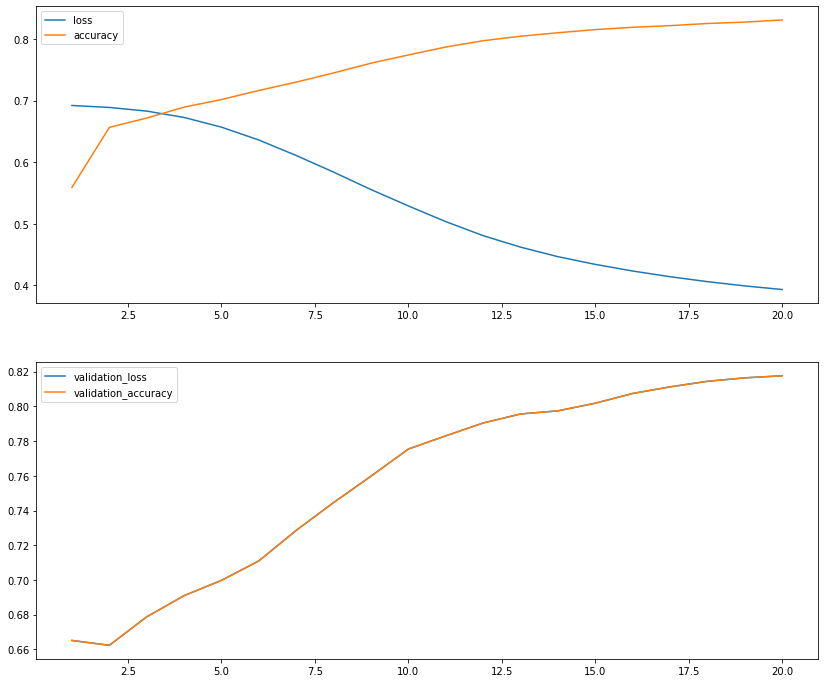

In [100]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss)+ 1)

val_loss = history.history['val_accuracy']
val_accuracy= history.history['val_accuracy']

fig, axes= plt.subplots(2, 1,figsize=(14,12))
axes[0].plot(epochs, loss, label="loss")
axes[0].plot(epochs, accuracy, label="accuracy")
axes[0].legend()
axes[1].plot(epochs, val_loss, label="validation_loss")
axes[1].plot(epochs, val_accuracy, label="validation_accuracy")
axes[1].legend()

In [1]:
files.download("/content/Sentiment_analysis")

NameError: ignored